In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('gender-classifier-DFE-791531.csv',encoding = "latin1")

In [3]:
df

,Unnamed: 0,text
0,0,robbie e respond critic win eddie edward world...
1,1,felt friend i live story http retire http
2,2,absolutely louis start song hit hard feel good
3,3,hi jordanspieth look url use ifttt do typicall...
4,4,watch neighbour catch neighbs xxx xxx
...,...,...
20045,20045,lookupondeath fine i drink tea i love
20046,20046,greg hardy good player get face dez bryant lea...
20047,20047,miss people still never want see
20048,20048,bitemyapp notice tendency pee carpet want say ...


In [4]:
df = df.drop(columns = ['Unnamed: 0'])

In [5]:
df.dtypes

text    object
dtype: object

In [6]:
df['text'] = df['text'].astype(str)

In [7]:
%load_ext autoreload
%autoreload 2

import os
import sys
module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import string
import re

# Notice that these vectorizers are from `sklearn` and not `nltk`!
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [8]:
vec = CountVectorizer(min_df = 0.001, max_df = 0.80)
X = vec.fit_transform(df['text'])

# .get_feature_names() attribute useful
countvec_df = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())
countvec_df


,able,absolutely,account,act,action,actually,add,address,adele,adult,...,ya,yeah,year,yes,yesterday,yet,yo,york,young,youtube
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20045,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20046,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20047,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20048,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
X

<20050x1155 sparse matrix of type '<class 'numpy.int64'>'
	with 101044 stored elements in Compressed Sparse Row format>

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [11]:
tf_vec = TfidfVectorizer()

In [12]:
X_tfidf = tf_vec.fit_transform(df['text'])

vec_tfidf = pd.DataFrame(X_tfidf.toarray(), columns=tf_vec.get_feature_names())
vec_tfidf.head()

,aaa,aaaaa,aaaaaaaa,aaaaaaall,aaaaahhhhhmmmm,aaahotdeal,aaallll,aaand,aaaree,aam,...,ãªwe,ãªwhy,ãªyear,ãªyes,ãªã,ãµ,ãµs,ã¼,ã¼es,ã¼p
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
vec_tfidf.iloc[313].sort_values(ascending=False)[:10]

crunch         0.429069
unfollowers    0.393833
number         0.362768
past           0.351691
stats          0.351691
follower       0.348439
week           0.293824
new            0.243961
http           0.120676
ã¼p            0.000000
Name: 313, dtype: float64

In [14]:
from collections import defaultdict
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import nltk
from nltk.tokenize import regexp_tokenize, word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords, wordnet
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

%load_ext autoreload
%autoreload 2

import os
import sys
module_path = os.path.abspath(os.pardir)
#print(module_path)
if module_path not in sys.path:
    sys.path.append(module_path)
    
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_auc_score
import numpy as np
import pandas as pd

# importing text preprocessing libraries
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
df

,text
0,robbie e respond critic win eddie edward world...
1,felt friend i live story http retire http
2,absolutely louis start song hit hard feel good
3,hi jordanspieth look url use ifttt do typicall...
4,watch neighbour catch neighbs xxx xxx
...,...
20045,lookupondeath fine i drink tea i love
20046,greg hardy good player get face dez bryant lea...
20047,miss people still never want see
20048,bitemyapp notice tendency pee carpet want say ...


In [16]:
df1 = pd.read_csv('gender-classifier-DFE-791531 copy 2.csv',encoding = "latin1")

In [17]:
df1.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12/5/13 1:48,...,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,...,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.587300e+17,NaN,Eastern Time (US & Canada)
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,...,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/15 12:40,6.587300e+17,clcncl,Belgrade
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,6/11/09 22:39,...,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/15 12:40,6.587300e+17,"Palo Alto, CA",Pacific Time (US & Canada)
4,815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,...,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/15 12:40,6.587300e+17,NaN,NaN


In [18]:
df2 = df1['text'].str.replace('http\S+|www.\S+', '', case=False)  # Removing URL's from data set
df2 = df2.str.replace(r'\<.*\>', '')  # Removing noise contained in '< >' these parenthesis
df2 = df2.str.replace('RT ', '', case=False)  # Removing the phrase 'RT" from all strings
df2 = df2.str.replace('@[^\s]+', '', case=False)  # Removing '@' and the following twitter handle from strings
df2 = df2.str.replace('[^\w\s]', ' ')  # Removing any punctuation
df2 = df2.str.replace('\r\n', ' ')  # Removing '\r\n' which is present in some strings
df2 = df2.str.replace('\d+', '').str.lower().str.strip()  # Removing numbers, capitalisation and white space

In [19]:
df2 = pd.concat([df1.gender,df2], axis = 1)

In [20]:
df2.head

<bound method NDFrame.head of        gender                                               text
0        male  robbie e responds to critics after win against...
1        male  ûïit felt like they were my friends and i was ...
2        male  i absolutely adore when louis starts the songs...
3        male  hi    looking at the url   do you use   don t ...
4      female  watching neighbours on sky  catching up with t...
...       ...                                                ...
20045  female           fine  and i ll drink tea too  i love you
20046    male  greg hardy you a good player and all but don t...
20047    male  you can miss people and still never want to se...
20048  female  i had noticed your tendency to pee on the carp...
20049  female  i think for my apush creative project i m goin...

[20050 rows x 2 columns]>

In [21]:
df2['gender'] = df2['gender'].astype(str)

In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [23]:
df2['gender']= le.fit_transform(df2['gender'])
df2['gender'].unique()

array([2, 1, 0, 4, 3])

In [24]:
df2 = df2.loc[df2['gender'] >= 1]
df2 = df2.loc[df2['gender'] <= 2]
df2['gender'].unique()

array([2, 1])

In [25]:
df2.dtypes

gender     int64
text      object
dtype: object

In [26]:
class TextPreprocessor(BaseEstimator, TransformerMixin):
    
    def __init__(self):
        
        #define attributes to store if text preprocessing requires fitting from data
        pass
    
    def fit(self, data, y = 0):
        # this is where you would fit things like corpus specific stopwords
        # fit probable bigrams with bigram model in here
        
        # save as parameters of Text preprocessor
        
        return self
    
    def transform(self, data, y = 0):
        fully_normalized_corpus = data.apply(self.process_doc)

        return fully_normalized_corpus
        
    
    def process_doc(self, doc):

        #initialize lemmatizer
        wnl = WordNetLemmatizer()
        stop_words = stopwords.words('english')
        
        # helper function to change nltk's part of speech tagging to a wordnet format.
        def pos_tagger(nltk_tag):
            if nltk_tag.startswith('J'):
                return wordnet.ADJ
            elif nltk_tag.startswith('V'):
                return wordnet.VERB
            elif nltk_tag.startswith('N'):
                return wordnet.NOUN
            elif nltk_tag.startswith('R'):
                return wordnet.ADV
            else:         
                return None


        # remove stop words and punctuations, then lower case
        doc_norm = [tok.lower() for tok in word_tokenize(doc) if ((tok.isalpha()) & (tok not in stop_words)) ]

        #  POS detection on the result will be important in telling Wordnet's lemmatizer how to lemmatize

        # creates list of tuples with tokens and POS tags in wordnet format
        wordnet_tagged = list(map(lambda x: (x[0], pos_tagger(x[1])), pos_tag(doc_norm))) 
        doc_norm = [wnl.lemmatize(token, pos) for token, pos in wordnet_tagged if pos is not None]

        return " ".join(doc_norm)

In [27]:
X = df2['text']
y = df2['gender']

In [28]:
proc = TextPreprocessor()

In [29]:
proc.fit_transform(X)

0        robbie e respond critic win eddie edward world...
1                 ûïit felt friend live story û retire ian
2           absolutely louis start song hit hard feel good
3              hi look url use typically see advanced user
4              watch neighbour sky catch neighbs xxx è xxx
                               ...                        
20045                                  fine drink tea love
20046    greg hardy good player get face dez bryant lea...
20047                     miss people still never want see
20048      noticed tendency pee carpet want say anything p
20049    think apush creative project go bring bacon cl...
Name: text, Length: 12894, dtype: object

In [30]:
prc_steps = [('token_norm', TextPreprocessor()), ('countvec', CountVectorizer(min_df = 0.005, max_df = 0.95))]
preprocess_pipeline = Pipeline(prc_steps)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [32]:
X_tr_proc = preprocess_pipeline.fit_transform(X_train)

In [33]:
X_tr_proc

<9025x236 sparse matrix of type '<class 'numpy.int64'>'
	with 25289 stored elements in Compressed Sparse Row format>

In [34]:
feat_names = preprocess_pipeline[
    'countvec'].get_feature_names()

pd.DataFrame(X_tr_proc.toarray(), columns = feat_names)

,actually,already,also,always,amas,amaze,amp,anything,artist,artistoftheyear,...,work,world,write,wrong,yeah,year,yes,yet,ûªs,ûó
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9020,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9021,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9022,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9023,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
class_priors = y_train.value_counts()/y_train.shape[0]
class_priors

1    0.520776
2    0.479224
Name: gender, dtype: float64

In [36]:
bow_mat = pd.DataFrame(X_tr_proc.toarray(), columns = feat_names)
bow_mat['gender'] = y_train
bow_mat

,actually,already,also,always,amas,amaze,amp,anything,artist,artistoftheyear,...,world,write,wrong,yeah,year,yes,yet,ûªs,ûó,gender
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9020,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
9021,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
9022,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
9023,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0


In [37]:
class1_bow_mat = bow_mat[bow_mat['gender'] == 1].drop(columns = ['gender'])

# class 1 token probabilities:
N_tok_1 = class1_bow_mat.sum(axis = 0) 
N_1 =  class1_bow_mat.values.sum()

# get probabilities for each token: class 1
proba_c1 = N_tok_1/N_1

proba_c1.sort_values(ascending = False)[0:10]

get      0.032324
go       0.022478
day      0.020249
make     0.019506
time     0.014676
know     0.013375
love     0.013004
think    0.012447
take     0.012261
new      0.011889
dtype: float64

In [38]:
class0_bow_mat = bow_mat[bow_mat['gender'] == 2].drop(columns = ['gender'])

# class 1 token probabilities:
N_tok_0 = class0_bow_mat.sum(axis = 0)
N_0 =  class0_bow_mat.values.sum() 

# get probabilities for each token: class 0
proba_c0 = N_tok_0/N_0

proba_c0.sort_values(ascending = False)[0:10]

get       0.032805
go        0.024874
time      0.019466
make      0.016763
love      0.016222
day       0.015501
see       0.012797
new       0.012257
people    0.011716
look      0.011355
dtype: float64

In [39]:
from scipy.stats import multinomial

In [40]:
from copy import deepcopy
mod_pipe = deepcopy(preprocess_pipeline)
mod_pipe.steps.append(('multinb', MultinomialNB()))
mod_pipe.steps

[('token_norm', TextPreprocessor()),
 ('countvec', CountVectorizer(max_df=0.95, min_df=0.005)),
 ('multinb', MultinomialNB())]

In [41]:
mod_pipe.fit(X_train, y_train)

Pipeline(steps=[('token_norm', TextPreprocessor()),
                ('countvec', CountVectorizer(max_df=0.95, min_df=0.005)),
                ('multinb', MultinomialNB())])

In [42]:
y_pred = mod_pipe.predict(X_test)

In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.56      0.64      0.60      2000
           2       0.54      0.46      0.50      1869

    accuracy                           0.55      3869
   macro avg       0.55      0.55      0.55      3869
weighted avg       0.55      0.55      0.55      3869



In [44]:
roc_auc_score(y_test, y_pred)

0.5497144194756555

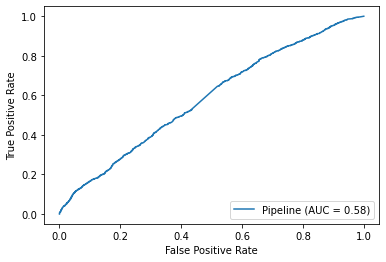

In [45]:
plot_roc_curve(mod_pipe, X_test, y_test)

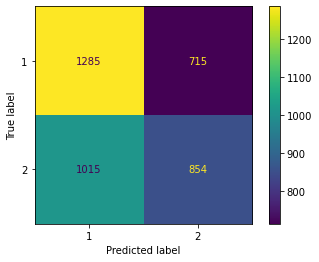

In [46]:
plot_confusion_matrix(mod_pipe, X_test, y_test)

In [47]:
from copy import deepcopy
tfidfmod_pipe = deepcopy(mod_pipe)
tfidfmod_pipe.steps[1] = ('tfidf', TfidfVectorizer(min_df=0.0000001, max_df=0.2)) # cuts words too rare/too frequent
tfidfmod_pipe.steps

[('token_norm', TextPreprocessor()),
 ('tfidf', TfidfVectorizer(max_df=0.2, min_df=1e-07)),
 ('multinb', MultinomialNB())]

In [48]:
tfidfmod_pipe.fit(X_train, y_train)
ypred_tfidf = tfidfmod_pipe.predict(X_test)

In [49]:
roc_auc_score(y_test, ypred_tfidf)

0.5951840556447298

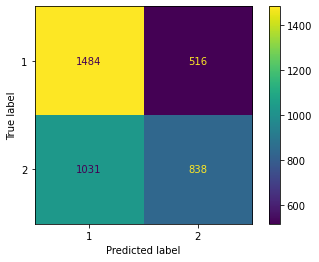

In [50]:
plot_confusion_matrix(tfidfmod_pipe, X_test, y_test)

In [51]:
from sklearn.linear_model import LogisticRegression

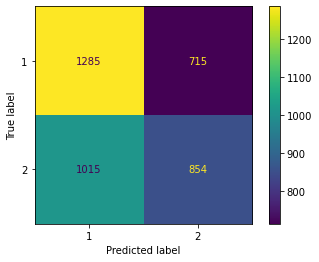

In [52]:
plot_confusion_matrix(mod_pipe, X_test, y_test)

In [53]:
from copy import deepcopy
logmod_pipe = deepcopy(mod_pipe)

In [54]:
logmod_pipe.steps[1] = ('tfidf', TfidfVectorizer(min_df=0.0000001, max_df=0.25))

In [55]:
logmod_pipe.steps[2] = ('clf', LogisticRegression())

In [56]:
logmod_pipe

Pipeline(steps=[('token_norm', TextPreprocessor()),
                ('tfidf', TfidfVectorizer(max_df=0.25, min_df=1e-07)),
                ('clf', LogisticRegression())])

In [57]:
logmod_pipe.fit(X_train, y_train)
ypred_logreg = logmod_pipe.predict(X_test)

In [58]:
roc_auc_score(y_test, ypred_logreg)

0.6027984216158374

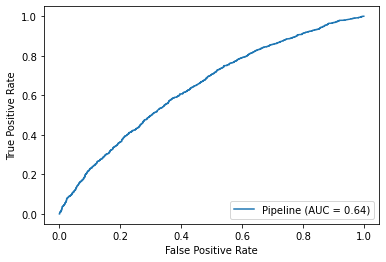

In [59]:
plot_roc_curve(logmod_pipe, X_test, y_test)

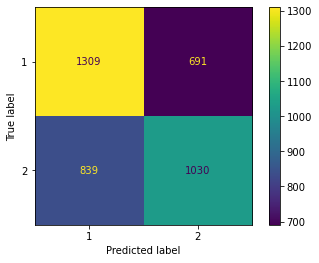

In [60]:
plot_confusion_matrix(logmod_pipe, X_test, y_test)

In [61]:
y_pred1 = logmod_pipe.predict(X_test)

In [62]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           1       0.61      0.65      0.63      2000
           2       0.60      0.55      0.57      1869

    accuracy                           0.60      3869
   macro avg       0.60      0.60      0.60      3869
weighted avg       0.60      0.60      0.60      3869



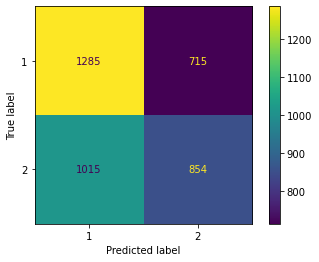

In [63]:
plot_confusion_matrix(mod_pipe, X_test, y_test)

In [64]:
df1.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12/5/13 1:48,...,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,...,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.587300e+17,NaN,Eastern Time (US & Canada)
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,...,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/15 12:40,6.587300e+17,clcncl,Belgrade
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,6/11/09 22:39,...,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/15 12:40,6.587300e+17,"Palo Alto, CA",Pacific Time (US & Canada)
4,815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,...,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/15 12:40,6.587300e+17,NaN,NaN


In [65]:
df_desc= pd.concat([df1['gender'],df1['description']],axis = 1)

In [66]:
df_desc.dropna(axis = 0, inplace = True)

In [67]:
#df_desc = df_desc['description'].str.replace('http\S+|www.\S+', '', case=False)  # Removing URL's from data set
#df_desc = df_desc.str.replace(r'\<.*\>', '')  # Removing noise contained in '< >' these parenthesis
#df_desc = df_desc.str.replace('RT ', '', case=False)  # Removing the phrase 'RT" from all strings
#df_desc = df_desc.str.replace('@[^\s]+', '', case=False)  # Removing '@' and the following twitter handle from strings
#df_desc = df_desc.str.replace('[^\w\s]', ' ')  # Removing any punctuation
#df_desc = df_desc.str.replace('\r\n', ' ')  # Removing '\r\n' which is present in some strings
#df_desc = df_desc.str.replace('\d+', '').str.lower().str.strip()


In [68]:
df_desc.head()

,gender,description
0,male,i sing my own rhythm.
1,male,I'm the author of novels filled with family dr...
2,male,louis whining and squealing and all
3,male,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe..."
4,female,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...


In [69]:
df_desc['gender'].unique()

array(['male', 'female', 'brand', 'unknown'], dtype=object)

In [70]:
df_desc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16224 entries, 0 to 20049
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   gender       16224 non-null  object
 1   description  16224 non-null  object
dtypes: object(2)
memory usage: 380.2+ KB


In [71]:
#df_desc['description'] = df_desc['description'].astype('str')
#df_desc['gender'] = df_desc['gender'].astype('str')

In [72]:
df_desc['gender'] = le.fit_transform(df_desc['gender'])

In [73]:
df_desc.head()

,gender,description
0,2,i sing my own rhythm.
1,2,I'm the author of novels filled with family dr...
2,2,louis whining and squealing and all
3,2,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe..."
4,1,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...


In [74]:
df_desc['gender'].unique()

array([2, 1, 0, 3])

In [75]:
df_desc['gender']= df_desc.loc[df_desc['gender'] >= 1]
df_desc['gender'] = df_desc.loc[df_desc['gender'] <= 2]

In [76]:
df_desc['gender'].unique()

array([2.0, 1.0, nan], dtype=object)

In [77]:
df_desc.dropna(inplace=True)

In [78]:
df_desc['gender'].unique()

array([2.0, 1.0], dtype=object)

In [79]:
df_desc.head()

,gender,description
0,2,i sing my own rhythm.
1,2,I'm the author of novels filled with family dr...
2,2,louis whining and squealing and all
3,2,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe..."
4,1,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...


In [80]:
df_desc.dropna(inplace=True)

In [81]:
X1 = df_desc['description']
y1 = df_desc['gender'].astype(str)

In [82]:
proc.fit_transform(X1)

0                                              sing rhythm
1                 i author novel fill family drama romance
2                                       louis whine squeal
3        mobile guy shazam google kleiner perkins sprin...
4        ricky wilson best chief best band xxxx thank k...
                               ...                        
20045                                                   rp
20046    problem chargernation foreverroyal edm mustfollow
20047    teambarcelona look lose follow follow heart br...
20048    i homeschool kid aspire thoughtleader field di...
20049                             teamwork make dream work
Name: description, Length: 11194, dtype: object

In [83]:
desc_steps = [('token_norm', TextPreprocessor()), ('countvec', CountVectorizer(max_features=5000,min_df = 0.005, max_df = 0.95))]
description_pipeline = Pipeline(desc_steps)

In [84]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.1)

In [85]:
X_tr_proc_desc = description_pipeline.fit_transform(X_train1)

In [86]:
X_tr_proc_desc

<10074x198 sparse matrix of type '<class 'numpy.int64'>'
	with 21298 stored elements in Compressed Sparse Row format>

In [87]:
feat_names = description_pipeline[
    'countvec'].get_feature_names()

pd.DataFrame(X_tr_proc_desc.toarray(), columns = feat_names)

,account,addict,also,always,animal,art,artist,author,baby,back,...,watch,way,well,wife,woman,work,world,write,writer,year
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10069,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10070,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10071,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10072,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [88]:
from copy import deepcopy
desc_pipe = deepcopy(description_pipeline)
desc_pipe.steps.append(('clf', LogisticRegression(#max_iter=2000
))

)
desc_pipe.steps

[('token_norm', TextPreprocessor()),
 ('countvec', CountVectorizer(max_df=0.95, max_features=5000, min_df=0.005)),
 ('clf', LogisticRegression())]

In [89]:
desc_pipe.fit(X_train1, y_train1)

Pipeline(steps=[('token_norm', TextPreprocessor()),
                ('countvec',
                 CountVectorizer(max_df=0.95, max_features=5000, min_df=0.005)),
                ('clf', LogisticRegression())])

In [90]:
y_pred_desc = desc_pipe.predict(X_test1)

In [91]:
print(classification_report(y_test1, y_pred_desc))

              precision    recall  f1-score   support

         1.0       0.59      0.73      0.65       585
         2.0       0.60      0.45      0.52       535

    accuracy                           0.60      1120
   macro avg       0.60      0.59      0.59      1120
weighted avg       0.60      0.60      0.59      1120



In [92]:
desc_pipe.steps[1] = ('tfidf', TfidfVectorizer(min_df=0.0000001, max_df=0.25,max_features=5000))

In [93]:
desc_pipe

Pipeline(steps=[('token_norm', TextPreprocessor()),
                ('tfidf',
                 TfidfVectorizer(max_df=0.25, max_features=5000, min_df=1e-07)),
                ('clf', LogisticRegression())])

In [94]:
desc_pipe.fit(X_train1,y_train1)

Pipeline(steps=[('token_norm', TextPreprocessor()),
                ('tfidf',
                 TfidfVectorizer(max_df=0.25, max_features=5000, min_df=1e-07)),
                ('clf', LogisticRegression())])

In [95]:
y_pred_desc = desc_pipe.predict(X_test1)

In [96]:
print(classification_report(y_test1, y_pred_desc))

              precision    recall  f1-score   support

         1.0       0.65      0.69      0.67       585
         2.0       0.64      0.60      0.62       535

    accuracy                           0.65      1120
   macro avg       0.65      0.65      0.65      1120
weighted avg       0.65      0.65      0.65      1120



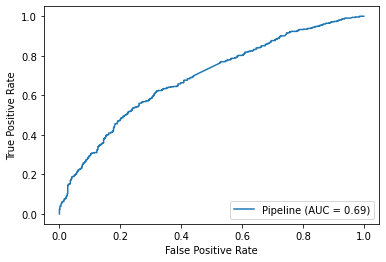

In [97]:
plot_roc_curve(desc_pipe, X_test1, y_test1)

In [98]:
roc_auc_score(y_test1, y_pred_desc)

0.6453790238836968

In [99]:
from copy import deepcopy 
nb_pipe = deepcopy(description_pipeline)
nb_pipe.steps.append(('multinb', MultinomialNB()))
nb_pipe.steps

[('token_norm', TextPreprocessor()),
 ('countvec', CountVectorizer(max_df=0.95, max_features=5000, min_df=0.005)),
 ('multinb', MultinomialNB())]

In [100]:
nb_pipe.fit(X_train1,y_train1)

Pipeline(steps=[('token_norm', TextPreprocessor()),
                ('countvec',
                 CountVectorizer(max_df=0.95, max_features=5000, min_df=0.005)),
                ('multinb', MultinomialNB())])

In [101]:
y_pred_desc1 = nb_pipe.predict(X_test1)

In [102]:
print(classification_report(y_test1, y_pred_desc1))

              precision    recall  f1-score   support

         1.0       0.59      0.77      0.67       585
         2.0       0.62      0.41      0.50       535

    accuracy                           0.60      1120
   macro avg       0.61      0.59      0.58      1120
weighted avg       0.61      0.60      0.59      1120



In [103]:
df_desc['gender'].unique()

array([2.0, 1.0], dtype=object)

In [104]:
y_test1.unique()

array(['1.0', '2.0'], dtype=object)

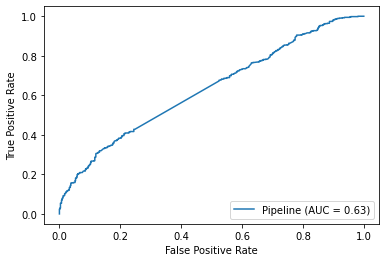

In [105]:
plot_roc_curve(nb_pipe, X_test1, y_test1)

In [106]:
top_gun_tweets = pd.read_csv('top_gun_tweets.csv')

In [107]:
top_gun_tweets.head()

,Unnamed: 0,Tweets
0,0,no copiercollin i m not going to wear a flight...
1,1,haven t eaten a tub of corn ina lil bit \ngue...
2,2,tomcruise whoever says you are looking old the...
3,3,man are crying while watching topgun movie an...
4,4,if you are a fan of top gun at all or even enj...


In [108]:
top_gun_tweets.drop(columns = 'Unnamed: 0')

,Tweets
0,no copiercollin i m not going to wear a flight...
1,haven t eaten a tub of corn ina lil bit \ngue...
2,tomcruise whoever says you are looking old the...
3,man are crying while watching topgun movie an...
4,if you are a fan of top gun at all or even enj...
...,...
995,for our third time seeing top gun maverick we ...
996,holdmyhand is the song of the week in many co...
997,much better than i expected \nthey made a hec...
998,if you don t see rr you will die an amrican ...


In [109]:
top_gun_tweets['Tweets'].astype('str')

0      no copiercollin i m not going to wear a flight...
1      haven t eaten a tub of corn ina lil bit  \ngue...
2      tomcruise whoever says you are looking old the...
3      man are crying while watching topgun movie  an...
4      if you are a fan of top gun at all or even enj...
                             ...                        
995    for our third time seeing top gun maverick we ...
996    holdmyhand is the  song of the week in many co...
997    much better than i expected  \nthey made a hec...
998    if you don t see rr you will die   an amrican ...
999                                      topgun was good
Name: Tweets, Length: 1000, dtype: object

In [110]:
X_test_tweets = top_gun_tweets['Tweets']

In [111]:
 X_test1.head()

6814                                      Most Dope ÷¨÷ø
15510    My twitter has no theme. literally no theme. I...
14467     Cynka | I don't know I don't care | _±¾¬£_«ø
15515    4th generation farmer. rubber boot enthusiast....
13371        I blog about beauty, life and crime novels :)
Name: description, dtype: object

In [112]:
proc.fit_transform(X_test_tweets)

0      copiercollin go wear flight suit movie theater...
1           eaten tub corn ina lil bit guess topgun time
2      tomcruise say look old crazy blow away felt to...
3              man cry watch topgun movie woman make fun
4      fan top gun even enjoy see new totally worth s...
                             ...                        
995    third time see top gun maverick try dx rd act ...
996    holdmyhand song week many country soooooooo go...
997    much well expect make heck movie enjoy want wa...
998    see rr die amrican thater watch usa encorrre s...
999                                          topgun good
Name: Tweets, Length: 1000, dtype: object

In [156]:
top_gun_predict = pd.DataFrame(desc_pipe.predict(X_test_tweets),columns = ['count'])

In [178]:
top_gun_predict.iloc[999]

count    1.0
Name: 999, dtype: float64

In [157]:
top_gun_predict.value_counts()

count
2.0      596
1.0      404
dtype: int64

In [196]:
top_gun_merged = pd.concat([top_gun_predict['count'],top_gun_tweets['Tweets']],axis=1)

In [189]:
top_gun_predict['count'] = top_gun_predict['count'].astype('float')

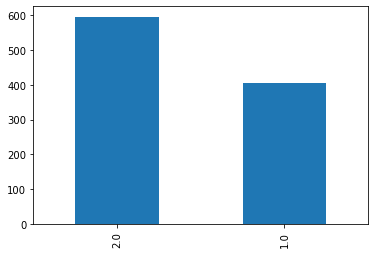

In [169]:
top_gun_predict['count'].value_counts().plot.bar();

In [158]:
top_gun_predict.dtypes

count    object
dtype: object

In [159]:
import matplotlib.pyplot as plt

In [209]:
df_women = top_gun_merged[top_gun_merged['count']==1]
df_men = top_gun_merged[top_gun_merged['count']==2]

In [210]:
len(df_women)

404

In [211]:
def opinion_words_txt2dict(opinion_words_file_path):
    """
    Converts a txt file of opinion words into a Python dictionary.
    Parameters:
       opinion_words_file_path (string): Path where the txt file is located.
    Returns:
       opinion_words_dictionary (dict): Python dictionary containing the opinion words.  
    """
    opinion_words_dictionary = dict()

    with open(opinion_words_file_path, 'r') as of:
        # we read the content of the file in the form of a list where each element is a line of the file
        opinion_words = of.readlines()
        # we iterate through each line of the file (a line contains an opinion word and its polarity)
        for opinion_word in opinion_words:
            word, polarity = opinion_word.strip().split('\t')
            # we add each opinion word and its polarity to the Python dictionary
            opinion_words_dictionary[word] = int(polarity)
            
    return opinion_words_dictionary

In [214]:
opinion_words_file_path = 'AFINN-111.txt'
opinion_words_dictionary = opinion_words_txt2dict(opinion_words_file_path)

# we visualize the dictionary
print(opinion_words_dictionary)


{'abandon': -2, 'abandoned': -2, 'abandons': -2, 'abducted': -2, 'abduction': -2, 'abductions': -2, 'abhor': -3, 'abhorred': -3, 'abhorrent': -3, 'abhors': -3, 'abilities': 2, 'ability': 2, 'aboard': 1, 'absentee': -1, 'absentees': -1, 'absolve': 2, 'absolved': 2, 'absolves': 2, 'absolving': 2, 'absorbed': 1, 'abuse': -3, 'abused': -3, 'abuses': -3, 'abusive': -3, 'accept': 1, 'accepted': 1, 'accepting': 1, 'accepts': 1, 'accident': -2, 'accidental': -2, 'accidentally': -2, 'accidents': -2, 'accomplish': 2, 'accomplished': 2, 'accomplishes': 2, 'accusation': -2, 'accusations': -2, 'accuse': -2, 'accused': -2, 'accuses': -2, 'accusing': -2, 'ache': -2, 'achievable': 1, 'aching': -2, 'acquit': 2, 'acquits': 2, 'acquitted': 2, 'acquitting': 2, 'acrimonious': -3, 'active': 1, 'adequate': 1, 'admire': 3, 'admired': 3, 'admires': 3, 'admiring': 3, 'admit': -1, 'admits': -1, 'admitted': -1, 'admonish': -2, 'admonished': -2, 'adopt': 1, 'adopts': 1, 'adorable': 3, 'adore': 3, 'adored': 3, 'ado

In [215]:
polarity_dictionary = {**opinion_words_dictionary }
def tweet_polarity(tweet, polarity_dictionary):
    """
    Computes the polarity of a tweet as the sum of the polarity of each of the opinion words and emojis in the tweet.
    Parameters:
       tweet (string): Tweet to analyze.
       polarity_dictionary(dictionary): Dictionary with the polarity of the opinion words and emojis.
    Returns:
       The polarity of a tweet (tweet_polarity), if the tweet contains opinion words or emojis, otherwise, None.  
    """
    # we get the polarity of the opinion words and emojis of the tweet
    word_polarities = [polarity_dictionary.get(word) for word in tweet.split()
                        if polarity_dictionary.get(word)]
    
    # if word_polarities is not empty we return the sum of the polarities of the opinion words and emojis of the tweet
    if word_polarities:
        # we calculate the polarity of a tweet as the sum of the polarities of its opinion words and emojis
        tweet_polarity = np.sum(word_polarities)
        return tweet_polarity
    
    # if word_polarities is empty, meaning there are not words with polarity in the tweet, the function returns None
    else:
        return None

In [221]:
polarities_women = [tweet_polarity(tweet, polarity_dictionary) for tweet in df_women['Tweets']]

# we visualize the polarity of the first 10 tweets
polarities_women[:10]

[-1, None, 10, -3, -9, None, 4, 4, None, None]

In [219]:
df_women.iloc[:10]

,count,Tweets
0,1.0,no copiercollin i m not going to wear a flight...
1,1.0,haven t eaten a tub of corn ina lil bit \ngue...
4,1.0,if you are a fan of top gun at all or even enj...
7,1.0,revi topgun\n\nbom filme \ni still feel bad ab...
11,1.0,breakingnews \n stocks ride rollercoaster high...
12,1.0,i definitely should have been casted in topgun
14,1.0,with everyone talking about the new topgun he...
15,1.0,tomcruise top gun maverick loved it topg...
16,1.0,in absolute bits topgun talktomedad
19,1.0,next samratprithviraj n then topgun


In [222]:
polarities_men = [tweet_polarity(tweet, polarity_dictionary) for tweet in df_men['Tweets']]

# we visualize the polarity of the first 10 tweets
polarities_men[:10]

[-2, 2, None, None, None, 1, None, 5, 9, None]

In [223]:
df_men.iloc[:10]

,count,Tweets
2,2.0,tomcruise whoever says you are looking old the...
3,2.0,man are crying while watching topgun movie an...
5,2.0,topgun\ntopgunmarverick\nbuy hold my hand on i...
6,2.0,topgun\ntopgunmarverick\nbuy hold my hand on i...
8,2.0,topgun\ntopgunmarverick\nbuy hold my hand on i...
9,2.0,the joke here is a repeated line don t think ...
10,2.0,topgun\ntopgunmarverick\nbuy hold my hand on i...
13,2.0,favorite film of the year so far and one of t...
17,2.0,that was everything \n\nmy joint favourite ...
18,2.0,brand new episode of the show is now live clic...


In [232]:
df_polarity_women = pd.DataFrame({'Tweets' : df_women['Tweets'], 'Polarity' : polarities_women})
df_polarity_men = pd.DataFrame({'Tweets' : df_men['Tweets'], 'Polarity' : polarities_men})

In [233]:
df_polarity_women.head()

,Tweets,Polarity
0,no copiercollin i m not going to wear a flight...,-1.0
1,haven t eaten a tub of corn ina lil bit \ngue...,NaN
4,if you are a fan of top gun at all or even enj...,10.0
7,revi topgun\n\nbom filme \ni still feel bad ab...,-3.0
11,breakingnews \n stocks ride rollercoaster high...,-9.0


In [250]:
print('Average Male Polarity: ', df_polarity_men['Polarity'].mean(), '\nAverage Female Polarity', df_polarity_women['Polarity'].mean()) 

Average Male Polarity:  3.1985645933014353 
Average Female Polarity 2.760869565217391


Text(0.5, 1.0, 'Polarity of the tweets from Women')

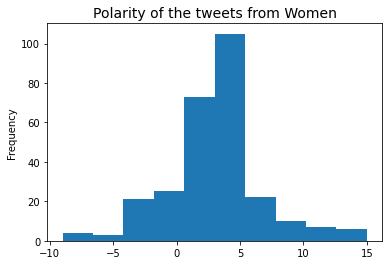

In [265]:
df_polarity_women.Polarity.plot(kind='hist',bins=10)
plt.title('Polarity of the tweets from Women', fontsize=14)

Text(0.5, 1.0, 'Polarity of the tweets from Men')

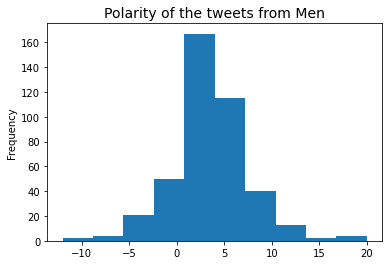

In [266]:
df_polarity_men.Polarity.plot(kind='hist',bins=10)
plt.title('Polarity of the tweets from Men', fontsize=14)

In [267]:
from os import path
from PIL import Image
import wor
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


ModuleNotFoundError: No module named 'wordcloud'